# Deep Learning を用いた Image Captioning

## 今日のゴール
* Deep Learningを用いたImage Captioningの概要を理解する
* (基本的な手法をコードで書けるようになる)
* 近年の研究動向や手法以外の重要な構成要素について知る

## 前提知識
Neural Network (NN) の概要  
　　Neural Networkがどのようなものなのかをなんとなく把握している
  
## 知っとくと話が早い知識
Convolutional Neural Network (CNN) の概要  
Recurrent Neural Network (RNN) の概要  
Embeddingと呼ばれる手法の概要  

## 今日の方針
細かなところは突っ込まず、概要を把握することを重視する  
  - そのためかなりゆるふわ説明でいきます
  - 細かなところを知りたい人は別途聞いてください
  
よろしくお願いします！

# 本日のアジェンダ
* そもそもImage Captioningって？
* Deep Learning を用いた Image Captioning を理解するための5ステップ
* 実装のノウハウ
* データセットのお話
* 評価方法のお話
* Image Captioningの向かう先・近年の研究動向

# そもそもImage Captioningって？
![Image Captioningの例](http://mscoco.cloudapp.net/static/images/captions-challenge2015.jpg)
<div style="text-align: center;">
Image Captioningのイメージ
引用：MSCOCO
</div>
画像の内容を説明するような自然文を、画像のみから自動で生成する手法のこと。

## できると何が嬉しい？
色々嬉しい！！
* 学術面では  
　　- 画像はコンピュータの目。画像処理の究極の目標は「画像の"内容"理解」。ここを目指す研究。  
　　- 言語に直せるということは（言語処理の部分がうまく作動するかはおいといて）理解しているということでは？  
　　- 結果の解釈も容易  
* 応用分野は  
　　- 自動運転、スマートカーナビへの適用  
　　- 視覚障害者向けのSNSの画像読み上げ  
　　- 詳細な画像アノテーション、画像検索への応用  
  ...
  
  
  

# Deep Learning を用いた Image Captioning を理解するための5ステップ

## ステップ1 CNN

![CNNの概要図](https://www.researchgate.net/profile/Siva_Chaitanya_Mynepalli/publication/281607765/figure/fig1/AS:284643598323714@1444875730488/Figure-1-Learning-hierarchy-of-visual-features-in-CNN-architecture.png)
<div style="text-align: center;">
CNNの概要図  
引用：https://www.researchgate.net/figure/281607765_fig1_Figure-1-Learning-hierarchy-of-visual-features-in-CNN-architecture
</div>

* CNNは画像処理の分野を中心に様々な分野で大きな成果を上げているNNのアーキテクチャ
* 特に画像認識の分野では人間を超えた性能を発揮している
* CNNの訓練では、(一般的に)入力となる生データとそれに付与する正解ラベルのペアをのみを与える
* CNNは訓練データから人間が定めた目的関数を最小化するようにパラメータを調整する(よい特徴を捉えられるようにパラメータを調整する)
* あるタスクで訓練されたCNNのパラメータはそのタスクに類似したり包含関係にあるタスクを解くために利用できることが知られている（fine tuning）


## ステップ2 RNNを用いた言語モデル

![RNNの概要図](https://image.slidesharecdn.com/20150831jcsssummer-150901075627-lva1-app6892/95/-44-638.jpg?cb=1441094377)
<div style="text-align: center;">
RNNを用いた言語モデルの概要図  
引用：言語と知識の深層学習@認知科学会サマースクール
</div>

* RNNは言語処理の分野を中心に大きな成果を上げているNNのアーキテクチャ
* 言語モデルとは人間が扱う「言葉」らしさを確率で扱うためのモデルのこと
* 言語モデルの分野では、RNNを用いた手法がデファクトスタンダードとなっている
* RNNを用いた言語モデルでは、ある単語を入力として、その次に出てくる単語の確率を推定する。これを繰り返して、"言語らしい"文章を生成する。


## ステップ3 Embedding
![cross domain embeddingの例](https://qph.ec.quoracdn.net/main-qimg-e8b83b14d7261d75754a92d0d3605e36)
<div style="text-align: center;">
Embedding後の空間の例  
引用：[What is word embedding in deep learning?](https://www.quora.com/What-is-word-embedding-in-deep-learning)
</div>

* Embeddingは画像や文書、単語と行った構造的なデータを低次元のベクトル空間に"埋め込む"手法のこと。word2vecなどが有名。(数学的には、数学的構造間の構造を保つような単射のことをEmbeddingという)
* CNNでもRNNでも、タスクを解くためにアーキテクチャの中で生データが低次元のベクトルに変換されている。これは擬似的にEmbeddingをしているとも捉えることができる。（実際は、変換後のベクトルに構造的な特徴があるかは不明なためEmbeddingとは言えない気がする）
* NNのアーキテクチャや目的関数を工夫することで、画像と単語のような異なるドメインのデータを同じベクトル空間にEmbeddingできることが知られている。

![画像-単語のembeddingの例](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/2e36ea91a3c8fbff92be2989325531b4002e2afc/12-Figure4-1.png)
<div style="text-align: center;">
画像-単語のEmbeddingの例    
引用：[Unifying Visual-Semantic Embeddings with Multimodal Neural Language Models](https://www.semanticscholar.org/paper/Unifying-Visual-Semantic-Embeddings-with-Multimoda-Kiros-Salakhutdinov/2e36ea91a3c8fbff92be2989325531b4002e2afc)
</div>

* NNでは、**画像だろうと自然言語だろうとベクトルに変換してしまえば同じように扱う**ことができる

## ステップ4 seq2seqを用いた機械翻訳

![seq2seqの概要図](https://camo.qiitausercontent.com/2efbd678be5ba58363152092695e959571dbf94c/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130303639382f39343962313933302d356462322d303038632d346462312d6164323462326565613466652e706e67)
<div style="text-align: center;">
seq2seqを用いた機械翻訳の概要図  
引用：[ChainerとRNNと機械翻訳](https://qiita.com/odashi_t/items/a1be7c4964fbea6a116e)
</div>

* seq2seqは機械翻訳や音声生成などの分野で大きな成果を上げているNNのアーキテクチャ
* seq2seqはencoderとdecoderのコンポーネントに分けられる
* seq2seqを用いた機械翻訳では、encoderはソースとなる言語の文章をRNNを用いた言語モデルへ入力し、その文章を表現するような低次元のベクトルを生成する。decoderではencoderが生成したベクトルを入力として、ターゲットとなる言語の文章を生成していく。
* seq2seqの長所は、encoderとdecoderの設計を工夫することで、様々なタスクへ応用できること。

## ステップ5 CNNとRNNによるseq2seqを用いたImage Captioning
![image captioningのNNの具体例](https://gigaom.com/wp-content/uploads/sites/1/2014/11/googlernncnn.png)
<div style="text-align: center;">
CNNとRNNによるseq2seqを用いたImage Captioningの概要図  
引用：[Show and Tell: A Neural Image Caption Generator](https://arxiv.org/abs/1411.4555)
</div>

* Image Captioningのタスクを**画像から文章への翻訳**のタスクと考える。そうすると、seq2seqモデルを適用して解くことができる。
* encoderではCNNを用いて画像を表現する低次元のベクトルを生成する。decoderではCNNの出力を入力として、RNNによる言語モデルを用いて文章を生成する。
* 訓練では、入力とする生データである画像と、そのデータの正解ラベルである画像に対する文章のペアを与えて、以下の目的関数を最大化するようにEnd-to-Endでパラメータの調整を行う。

\begin{equation}
  \theta^* = argmax_{\theta} \sum_{(I, S)} (S  |  I; \theta)
\end{equation}


# 実装のノウハウ
ここまででDeep Learningを用いた最も基本的なImage Captioningシステムの概要は把握できたはずなので、実際に実装を行うことを考えてみる。
実際の実装の手順は以下の通り。

1. encoderとなるCNNの構造を定義する。
2. 1.で定義したCNNを画像認識のタスクで事前学習を行う。これを行わないと、学習に時間がかかってしまったり、うまく学習できなかったりする。
3. decoderとなるRNNの構造を定義し、CNNとつなげてseq2seqモデルを構築する
4. 以下に示す目的関数を最小化するようにパラメータの調整を行う

\begin{equation}
  L(I, S) = -\sum_{n=1}^{N}\log p_t(S_t)
\end{equation}

In [ ]:
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import initializers

class CNNEncoder(chainer.Chain):

    def __init__(self):
        raise NotImplementedError()

    def __call__(self, x):
        raise NotImplementedError()
        
class RNNDecoder(chainer.Chain):

    def __init__(self):
        raise NotImplementedError()
        
    def __call__(self, x):
        raise NotImplementedError()
        
class Seq2SeqImageCaptionModel(chainer.Chain):
    def __init__(self, n_units, n_out):
        super(Seq2SeqImageCaptionModel, self).__init__()
        with self.init_scope():
            self.enc = CNNEncoder()
            self.dec = RNNDecoder()
            
    def init_state(self, img_feature):
        """
        encoderの出力でRNNの重みを初期化
        """
        raise NotImplementedError()

    def __call__(self, x):
        h = CNNEncoder(x)
        y = RNNDecoder(h)
        
        return y

# データセットのお話
Image Captioningが登場し発展したのは、このモデルを訓練するための高品質なデータセットが登場したため。  
以下に代表的なデータセットを示す  

## flicker8k, 30k
http://nlp.cs.illinois.edu/HockenmaierGroup/8k-pictures.html # 8k  
Image Captioningのデータセットの先駆け的な存在。  
flickerに投稿されたCCライセンスの画像に人間が説明文をアノテーションしたもの  

## MSCOCO
http://cocodataset.org/#home  
最も広く使われているデータセット  
約80k枚（だった気がする）の画像ごとに5つの説明文が付与されている  
Yahoo! Japanがこれを日本語に翻訳したデータセットを公開している

## visual genome
http://visualgenome.org/  
様々なタスクに使えるデータがまとまったオールインワンセット  
画像中の物体の位置、その物体の属性、物体間の関係性、画像の説明文、画像に対する質問応答のデータが一つにまとまっている。  

# 評価方法のお話
実は、「良い説明文を生成できているか」を定量的に評価することはとっても難しい。  
ここでも機械翻訳の知見を使って評価されることが多い。  

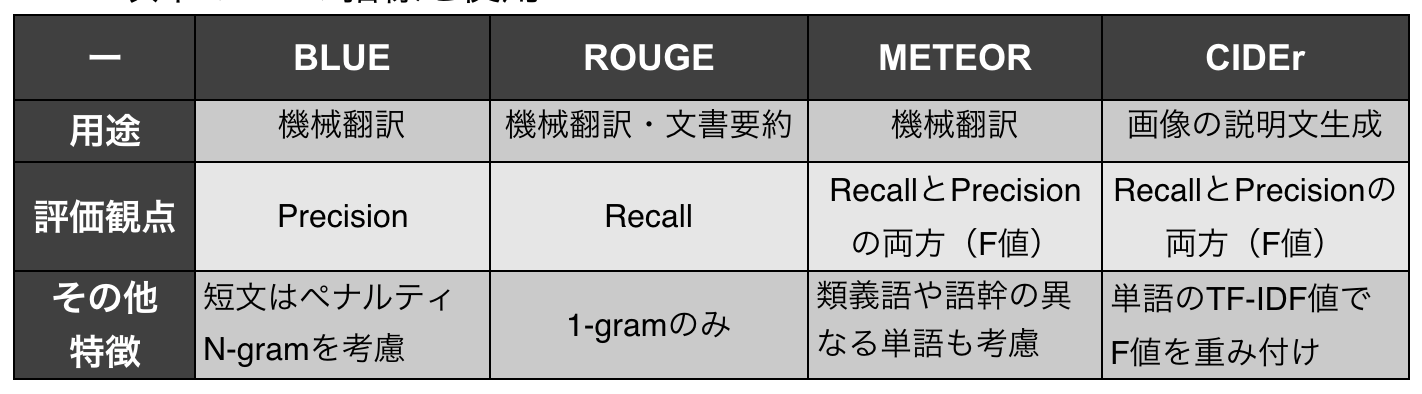
<div style="text-align: center;">
Image Captioningの評価指標の概要 
引用：ぼくの修士1年の研究の発表資料
</div>

## BLEU
機械翻訳の分野で最も広く使われる評価指標  
正解文と予測文の間にN-gramの表現がどの程度出現したかの割合
precisionに相当するので、分母は予測文の語数になる

## ROUGE
機械翻訳や文書要約の評価に使われる評価指標
blueはprecisionを考慮した指標だが、こちらはrecallを考慮した指標

## METEOR
機械翻訳の分野で使われる評価指標
事前に用意した類義語辞書を用いて、類義語も考慮したBLEUの計算を行う

## CIDEr
Image Captioningのために提案された評価指標
F値(precision, recallの両方を考慮)を計算する指標で、tf-idfの考えを用いて重み付けを行う

## SPICE
こちらもImage Captioningのために提案された評価指標
説明文をScene Graphと呼ばれるデータ構造に変換してから、Scene Graph中に出現するノード組間のF値を計算する

![SPICEの例](http://www.panderson.me/images/spice-concept.png)
<div style="text-align: center;">
SPICEの概要図
引用：[SPICE: Semantic Propositional Image Caption Evaluation](http://www.panderson.me/spice/)
</div>

# Image Captioningの向かう先・近年の研究動向
来た人限定！！